In [529]:
# Import Libraries
import joblib
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPRegressor

plt.style.use({'figure.facecolor':'white'})

In [530]:
# Read CSV
df = pd.read_csv('C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Data/Manual Readings of pH, EC and Temperature.csv').drop(['ppm'], 1)
df.head()

,Temperature,pH,Adjusted pH,EC
0,24.81,7.0,6.908699,0.82
1,25.31,7.0,6.978184,0.29
2,25.56,7.0,6.973090,0.48
3,25.75,7.0,6.935358,0.48
4,25.75,7.0,7.010641,0.47


In [531]:
df.describe()

,Temperature,pH,Adjusted pH,EC
count,252.000000,252.000000,252.000000,252.000000
mean,25.408373,6.366667,6.346189,1.711310
std,0.429798,0.390117,0.384282,0.670198
min,23.870000,5.800000,5.688092,0.270000
25%,25.120000,6.000000,6.034491,1.420000
50%,25.440000,6.500000,6.377082,1.810000
75%,25.690000,6.600000,6.611272,2.110000
max,26.250000,7.000000,7.066736,2.630000


In [532]:
scaler = MinMaxScaler(feature_range=(0, 3))
scaled_data = scaler.fit_transform(df.drop(['EC'], 1))
df = pd.DataFrame({'Temperature': scaled_data[:, 0], 'pH': scaled_data[:, 1], 'Adjusted pH': scaled_data[:, 2], 'EC': df['EC']})

In [533]:
df.describe()

,Temperature,pH,Adjusted pH,EC
count,252.000000,252.000000,252.000000,252.000000
mean,1.939126,1.416667,1.432053,1.711310
std,0.541762,0.975292,0.836216,0.670198
min,0.000000,0.000000,0.000000,0.270000
25%,1.575630,0.500000,0.753783,1.420000
50%,1.978992,1.750000,1.499277,1.810000
75%,2.294118,2.000000,2.008887,2.110000
max,3.000000,3.000000,3.000000,2.630000


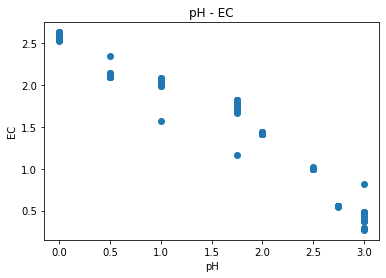

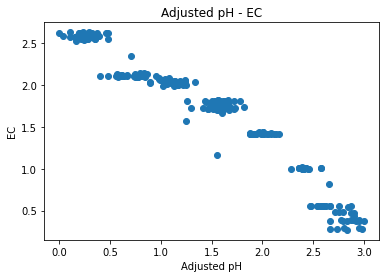

In [534]:
EC, pH, adjusted_pH = df[['EC']], df[['pH']], df[['Adjusted pH']]

# Plot between pH and EC
plt.scatter(pH, EC)
plt.title('pH - EC')
plt.xlabel('pH')
plt.ylabel('EC')
plt.show()

# Plot between Adjusted pH and EC
plt.scatter(adjusted_pH, EC)
plt.title('Adjusted pH - EC')
plt.xlabel('Adjusted pH')
plt.ylabel('EC')
plt.show()

In [535]:
# Extract Input Columns ( Adjusted pH, Temperature )
X_adjusted = df[['Adjusted pH', 'Temperature']]
X_adjusted.head()

,Adjusted pH,Temperature
0,2.656102,1.184874
1,2.807307,1.815126
2,2.796221,2.130252
3,2.714114,2.369748
4,2.877934,2.369748


In [536]:
# Extract Output Columns ( EC )
y_adjusted = df[['EC']]
y_adjusted.head()

,EC
0,0.82
1,0.29
2,0.48
3,0.48
4,0.47


In [537]:
# Extract Input Columns ( Original pH, Temperature )
X_original = df[['pH', 'Temperature']]
X_original.head()

,pH,Temperature
0,3.0,1.184874
1,3.0,1.815126
2,3.0,2.130252
3,3.0,2.369748
4,3.0,2.369748


In [538]:
# Extract Output Columns ( EC )
y_original = df[['EC']]
y_original.head()

,EC
0,0.82
1,0.29
2,0.48
3,0.48
4,0.47


In [539]:
# Split Train & Test Data For Both Adjusted & Original Values
X_adjusted_train, X_adjusted_test, y_adjusted_train, y_adjusted_test = train_test_split(X_adjusted, y_adjusted, random_state=1)
X_original_train, X_original_test, y_original_train, y_original_test = train_test_split(X_original, y_original, random_state=1)

y_adjusted_train = y_adjusted_train.values.ravel()
y_adjusted_test = y_adjusted_test.values.ravel()

y_original_train = y_original_train.values.ravel()
y_original_test = y_original_test.values.ravel()

In [540]:
# Fit Two Models With Both Original & Adjusted Data
adjusted_data_model = MLPRegressor(random_state=1, max_iter=1000, activation='relu', hidden_layer_sizes=(100, 50, 50)).fit(X_adjusted_train, y_adjusted_train)
original_data_model = MLPRegressor(random_state=1, max_iter=1000, activation='relu', hidden_layer_sizes=(100, 50, 50)).fit(X_original_train, y_original_train)

In [541]:
# Generate Losses For Both Adjusted & Original Models
adjusted_data_model_loss = adjusted_data_model.loss_curve_
original_data_model_loss = original_data_model.loss_curve_

adjusted_data_model_iteration = list(range(1, len(adjusted_data_model_loss) + 1))
original_data_model_iteration = list(range(1, len(original_data_model_loss) + 1))

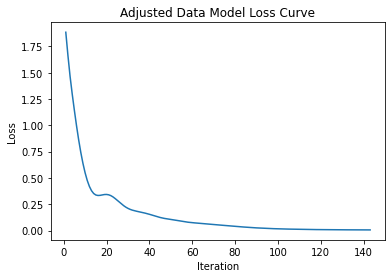

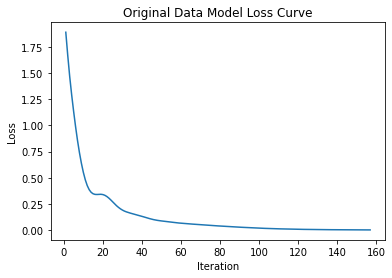

In [542]:
# Adjusted Data Model Loss Curve
plt.plot(adjusted_data_model_iteration, adjusted_data_model_loss)
plt.title('Adjusted Data Model Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Original Data Model Loss Curve
plt.plot(original_data_model_iteration, original_data_model_loss)
plt.title('Original Data Model Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [543]:
# Checking The R2 Score Of Both Models
adjusted_data_model_score = adjusted_data_model.score(X_adjusted_test, y_adjusted_test)
original_data_model_score = original_data_model.score(X_original_test, y_original_test)

print('Adjusted Data Model Score: ', adjusted_data_model_score)
print('Original Data Model Score: ', original_data_model_score)

Adjusted Data Model Score:  0.9692546323525276
Original Data Model Score:  0.9728238747554194


In [544]:
# Saving The Models
joblib.dump(adjusted_data_model, 'C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/EC - pH Adjusted Data Model.h5')
joblib.dump(original_data_model, 'C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/EC - pH Original Data Model.h5')


['C:/Users/mwaqa/Desktop/FYP-Soil-Analysis/Models/EC - pH Original Data Model.h5']